In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
def read_dataset():
    df=pd.read_csv('sonar.csv')
    X=df[df.columns[0:60]].values
    y=df[df.columns[60]]
    
    #Encode the dependent variable
    encoder=LabelEncoder()
    encoder.fit(y)
    y=encoder.transform(y)
    Y=one_hot_encode(y)
    print(X.shape)
    return(X,Y)

In [3]:
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode

In [4]:
X,Y=read_dataset()

(207, 60)


In [5]:
X,Y=shuffle(X,Y,random_state=1)

In [6]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=415)
#Inspect the shape of training and testing
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(165, 60)
(165, 2)
(42, 60)


In [7]:
learning_rate=0.3
training_epochs=1000
cost_history=[]
n_dim=X.shape[1]
print("n_dim",n_dim)
n_class=2
model_path="C:\\Users\hp\Desktop\\dl"

n_dim 60


In [8]:
n_hidden_1=60
n_hidden_2=60
n_hidden_3=60
n_hidden_4=60

In [9]:
x=tf.placeholder(tf.float32,[None,n_dim])
W=tf.Variable(tf.zeros([n_dim,n_class]))
b=tf.Variable(tf.zeros([n_class]))
y_=tf.placeholder(tf.float32,[None,n_class])

Instructions for updating:
Colocations handled automatically by placer.


# # define the model

In [10]:
def multilayer_perceptron(x,weights,biases):
    # Hidden Layer with RELU activation
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    
    # Hidden layer with sigmoid activation
    
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.sigmoid(layer_2)
    
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3=tf.nn.sigmoid(layer_3)
    
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4=tf.nn.sigmoid(layer_3)
    
    #Output layer with Linear activation
    
    out_layer=tf.matmul(layer_4,weights['out'])+biases['out']
    return out_layer

# #Define the weights and biases for each layer of the model

In [11]:
weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}


# # Initialize all the variables

In [12]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

# #Call the defined model

In [13]:
y=multilayer_perceptron(x,weights,biases)

# #Define the cost function and optimizer

In [14]:
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [16]:
sess=tf.Session()

In [17]:
sess.run(init)

# #Calculate the cost and accuracy for each epoch

In [18]:
mse_history=[]
accuracy_history=[]

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost=sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
    cost_history=np.append(cost_history,cost)
    correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    #print accuracy
    
    pred_y=sess.run(y,feed_dict={x:test_x})
    mse=tf.reduce_mean(tf.square(pred_y-test_y))
    
    mse_=sess.run(mse)
    mse_history.append(mse_)
    accuracy=(sess.run(accuracy,feed_dict={x:train_x,y_:train_y}))
    accuracy_history.append(accuracy)
    
    print('epoch:',epoch,'-','cost:',cost,"-MSE:",mse_,"-Train Accuracy:",accuracy)
    
save_path=saver.save(sess,model_path)
print("Model saved in file: %s" % save_path)

epoch: 0 - cost: 1.6161852 -MSE: 7.698822659759992 -Train Accuracy: 0.45454547
epoch: 1 - cost: 1.8852533 -MSE: 10.098118146185467 -Train Accuracy: 0.54545456
epoch: 2 - cost: 1.2458682 -MSE: 6.791965056203958 -Train Accuracy: 0.45454547
epoch: 3 - cost: 1.8623728 -MSE: 10.052489821077623 -Train Accuracy: 0.54545456
epoch: 4 - cost: 1.2473426 -MSE: 6.863122317383213 -Train Accuracy: 0.45454547
epoch: 5 - cost: 1.8522922 -MSE: 10.069201076103278 -Train Accuracy: 0.54545456
epoch: 6 - cost: 1.2393364 -MSE: 6.912555293669253 -Train Accuracy: 0.45454547
epoch: 7 - cost: 1.8385392 -MSE: 10.068502002623891 -Train Accuracy: 0.54545456
epoch: 8 - cost: 1.2346536 -MSE: 6.9694283101100085 -Train Accuracy: 0.45454547
epoch: 9 - cost: 1.8260769 -MSE: 10.07283247514256 -Train Accuracy: 0.54545456
epoch: 10 - cost: 1.2295841 -MSE: 7.023628979064741 -Train Accuracy: 0.45454547
epoch: 11 - cost: 1.8136271 -MSE: 10.075276427997414 -Train Accuracy: 0.54545456
epoch: 12 - cost: 1.2252011 -MSE: 7.07661306

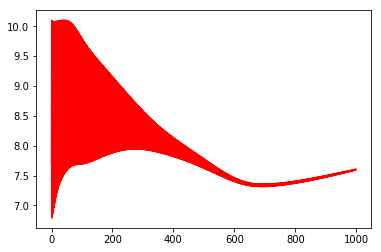

In [19]:
#Plot mse and accuracy graph
plt.plot(mse_history,'r')
plt.show()

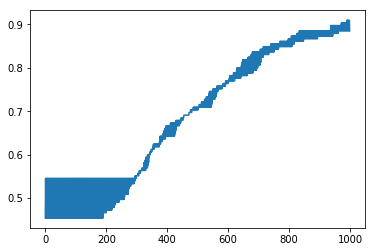

In [20]:
plt.plot(accuracy_history)
plt.show()

# # print the final accuracy

In [21]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy:",(sess.run(accuracy,feed_dict={x:test_x,y_:test_y})))

Test Accuracy: 0.8333333


# #print the final mean square error

In [22]:
pred_y=sess.run(y,feed_dict={x:test_x})
mse=tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE:%.4f" % sess.run(mse))

MSE:7.6073


In [23]:
prediction=tf.argmax(y,1)
correct_prediction=tf.equal(prediction,tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

# #print accuracy run

In [24]:
print('******************************')
print("0 stands for M i.e. Mine and 1 stands for R i.e. Rock")
print('******************************')

for i in range(2,12):
    
    prediction_run = sess.run(prediction, feed_dict={x:X[i].reshape(1,60)})
    accuracy_run = sess.run(accuracy, feed_dict={x:X[i].reshape(1,60), y_:Y[i].reshape(1,2)})
    print(i,"Original Class: ", int(sess.run(y_[i][1],feed_dict={y_:Y})), " Predicted Values: ", prediction_run[0] )
    print("Accuracy: ",str(accuracy_run*100)+"%")

******************************
0 stands for M i.e. Mine and 1 stands for R i.e. Rock
******************************
2 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
3 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
4 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
5 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
6 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
7 Original Class:  1  Predicted Values:  0
Accuracy:  0.0%
8 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
9 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
10 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
11 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
